Real estate price predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("HousingData.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0,0.458,NaN,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    int64  
 4   NOX      394 non-null    float64
 5   RM       390 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 43.2 KB


In [5]:
housing['CHAS'].value_counts()

0    367
1     27
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,390.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.279626,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.700015,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.194000,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline
# When you run %matplotlib inline, it instructs the Jupyter environment to 
# display any generated plots or charts directly within the notebook interface rather than in separate windows or external applications.

In [8]:
import matplotlib.pyplot as plt

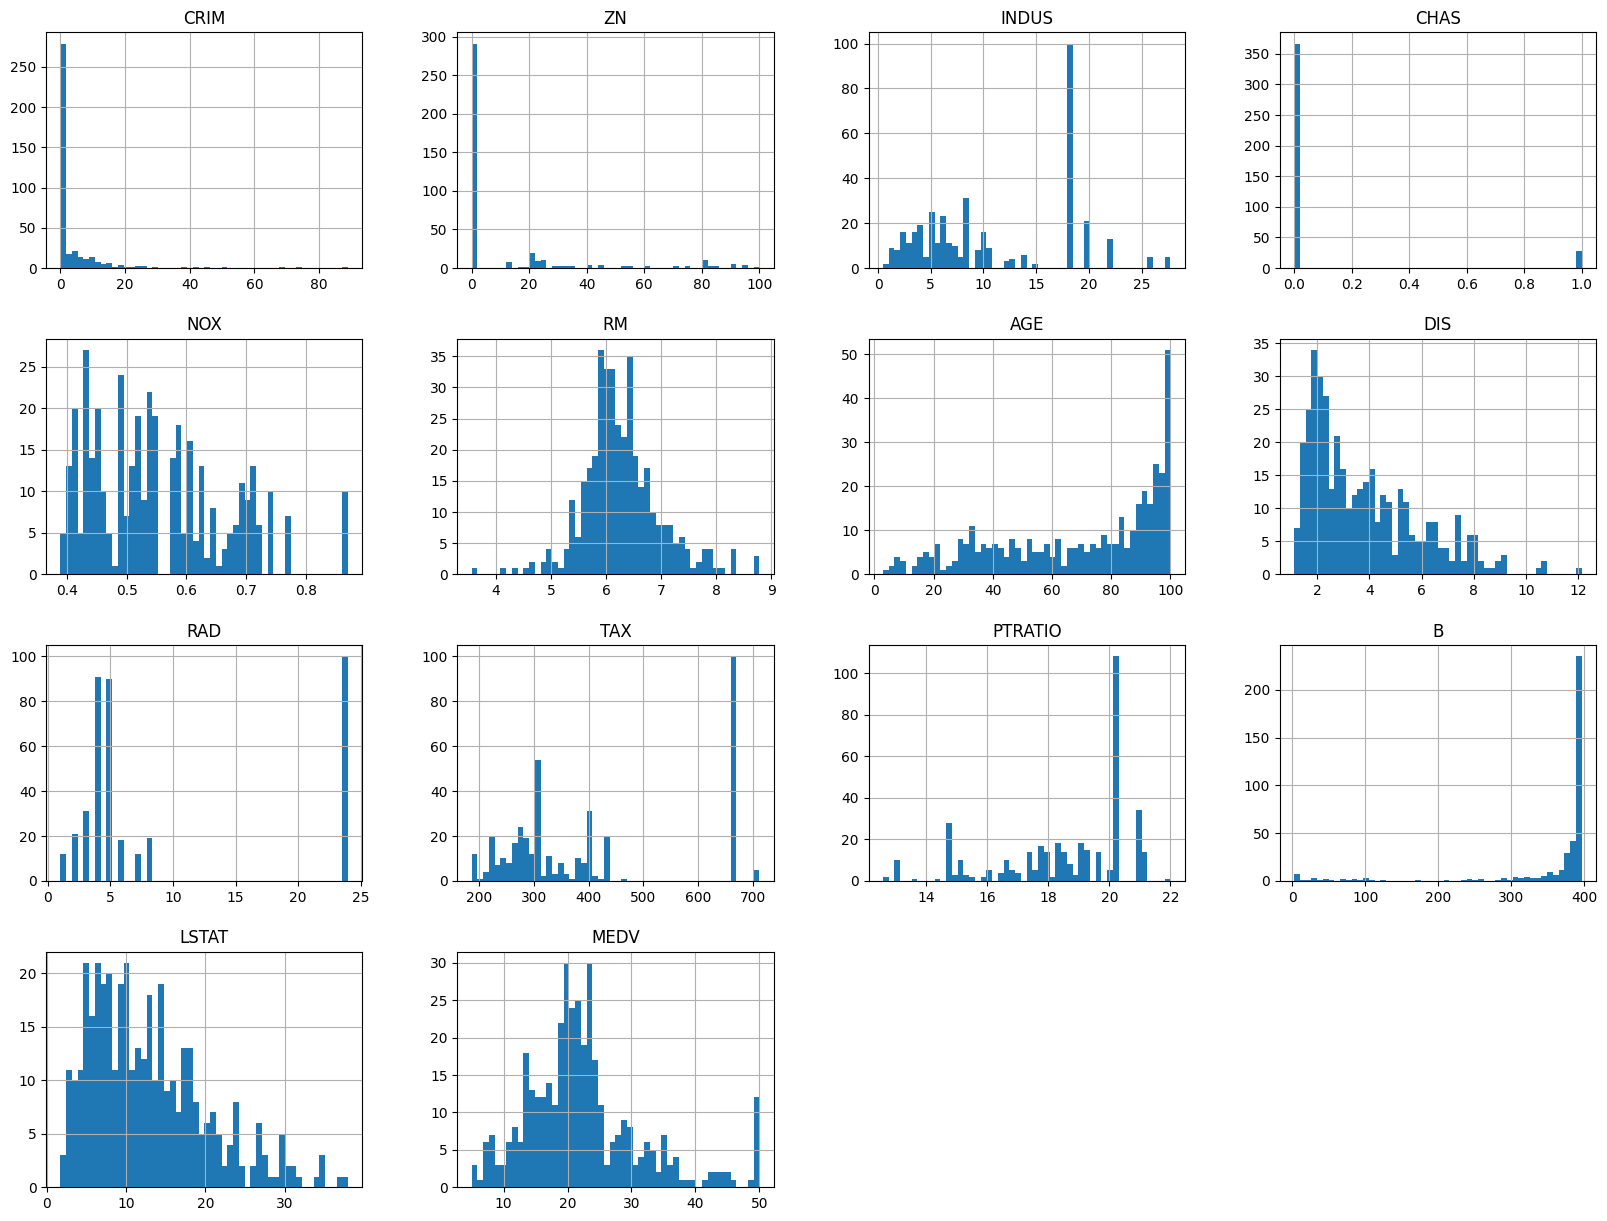

In [9]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
# import numpy as np
# def split_train_test(data,test_ratio):
#     shuffled=np.random.permutation(len(data))
#     np.random.seed(42)
#     print(shuffled)
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
# train_set,test_set=split_train_test(housing,0.2)

In [12]:
# print("number of rows in training set ",len(train_set))

In [13]:
# print("number of rows in training set ",len(test_set))

In [14]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [15]:
print("number of rows in training set ",len(train_set))

number of rows in training set  315


In [16]:
print("number of rows in training set ",len(test_set))

number of rows in training set  79


In [17]:
#there is one problem example such that there will be problem if all 1's of CHAS are in
# test then train doesnt have 1's itself and so we need stratified sampling

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [19]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,315.000000,315.000000,315.000000,315.000000,315.000000,312.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,3.544795,11.107937,11.099206,0.069841,0.552733,6.263455,69.069524,3.790850,9.409524,408.111111,18.555238,358.068000,12.771270,22.047937
std,8.452387,23.951771,6.894365,0.255285,0.113680,0.682981,27.654691,2.052634,8.698812,168.669778,2.092798,89.861766,7.159835,8.700839
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081005,0.000000,5.190000,0.000000,0.448500,5.878750,45.750000,2.123450,4.000000,282.500000,17.400000,376.815000,7.160000,16.700000
50%,0.269380,0.000000,8.560000,0.000000,0.538000,6.179500,77.300000,3.262800,5.000000,330.000000,19.100000,392.300000,11.450000,21.100000
75%,3.521480,0.000000,18.100000,0.000000,0.624000,6.569000,94.100000,5.057250,24.000000,666.000000,20.200000,396.900000,17.140000,24.750000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [20]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 368 to 233
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     315 non-null    float64
 1   ZN       315 non-null    float64
 2   INDUS    315 non-null    float64
 3   CHAS     315 non-null    int64  
 4   NOX      315 non-null    float64
 5   RM       312 non-null    float64
 6   AGE      315 non-null    float64
 7   DIS      315 non-null    float64
 8   RAD      315 non-null    int64  
 9   TAX      315 non-null    int64  
 10  PTRATIO  315 non-null    float64
 11  B        315 non-null    float64
 12  LSTAT    315 non-null    float64
 13  MEDV     315 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 36.9 KB


In [21]:
strat_test_set['CHAS'].value_counts()

0    74
1     5
Name: CHAS, dtype: int64

In [22]:
housing=strat_train_set.copy()

In [23]:
strat_train_set['CHAS'].value_counts()

0    293
1     22
Name: CHAS, dtype: int64

In [24]:
# 74/5

In [25]:
# 293/22

In [26]:
corr_matrix=housing.corr()

In [27]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695201
ZN         0.397121
B          0.366832
DIS        0.314251
CHAS       0.162370
RAD       -0.429900
CRIM      -0.433003
AGE       -0.451049
NOX       -0.488618
PTRATIO   -0.515254
TAX       -0.516588
INDUS     -0.529225
LSTAT     -0.760489
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

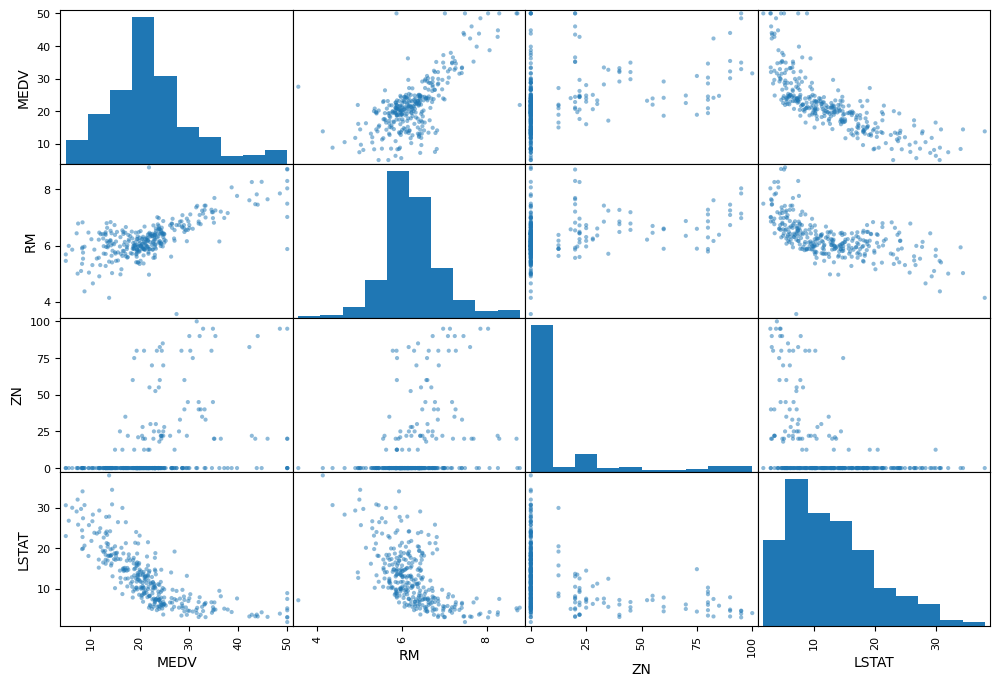

In [28]:
from pandas.plotting import scatter_matrix
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(12,8))

C:\Users\Ananya N\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='RM', ylabel='MEDV'>

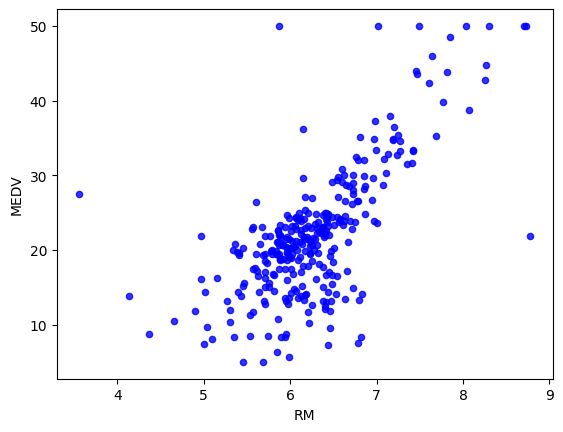

In [29]:
housing.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8,c="blue")

In [30]:
# attribute combinations for example tax per room(tpm)

In [31]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [32]:
housing['TAXRM']

368    102.714374
199     32.734102
324     98.201121
89      65.629807
343    102.698535
          ...    
57      58.693433
389     70.210092
77      42.154567
311    113.807245
233     52.103042
Name: TAXRM, Length: 315, dtype: float64

In [33]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
368,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
199,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11,44.0,32.734102
324,10.83420,0.0,18.10,0,0.679,6.782,90.8,1.8195,24,666,20.2,21.57,25.79,7.5,98.201121
89,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47,19.5,65.629807
343,9.96654,0.0,18.10,0,0.740,6.485,100.0,1.9784,24,666,20.2,386.73,18.85,15.4,102.698535


In [34]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695201
ZN         0.397121
B          0.366832
DIS        0.314251
CHAS       0.162370
RAD       -0.429900
CRIM      -0.433003
AGE       -0.451049
NOX       -0.488618
PTRATIO   -0.515254
TAX       -0.516588
INDUS     -0.529225
TAXRM     -0.579493
LSTAT     -0.760489
Name: MEDV, dtype: float64

In [35]:
# TAXRM is highly negative correlated

C:\Users\Ananya N\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='TAXRM', ylabel='MEDV'>

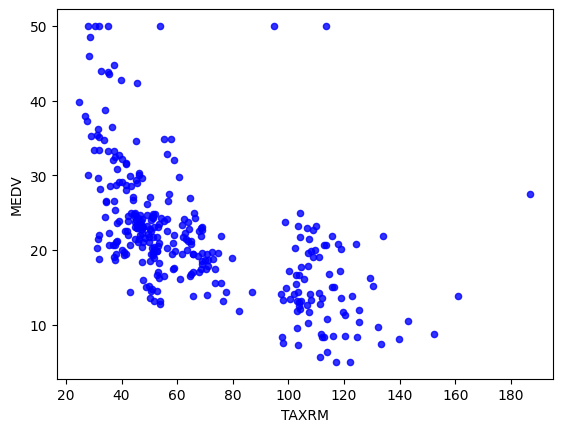

In [36]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.8,c="blue")
# high negative correlation

In [37]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [38]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,315.000000,315.000000,315.000000,315.000000,315.000000,312.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,3.544795,11.107937,11.099206,0.069841,0.552733,6.263455,69.069524,3.790850,9.409524,408.111111,18.555238,358.068000,12.771270
std,8.452387,23.951771,6.894365,0.255285,0.113680,0.682981,27.654691,2.052634,8.698812,168.669778,2.092798,89.861766,7.159835
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.081005,0.000000,5.190000,0.000000,0.448500,5.878750,45.750000,2.123450,4.000000,282.500000,17.400000,376.815000,7.160000
50%,0.269380,0.000000,8.560000,0.000000,0.538000,6.179500,77.300000,3.262800,5.000000,330.000000,19.100000,392.300000,11.450000
75%,3.521480,0.000000,18.100000,0.000000,0.624000,6.569000,94.100000,5.057250,24.000000,666.000000,20.200000,396.900000,17.140000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000


In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 368 to 233
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     315 non-null    float64
 1   ZN       315 non-null    float64
 2   INDUS    315 non-null    float64
 3   CHAS     315 non-null    int64  
 4   NOX      315 non-null    float64
 5   RM       312 non-null    float64
 6   AGE      315 non-null    float64
 7   DIS      315 non-null    float64
 8   RAD      315 non-null    int64  
 9   TAX      315 non-null    int64  
 10  PTRATIO  315 non-null    float64
 11  B        315 non-null    float64
 12  LSTAT    315 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 34.5 KB


In [40]:
housing_labels.info()
housing_labels.describe()

<class 'pandas.core.series.Series'>
Int64Index: 315 entries, 368 to 233
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
315 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


count    315.000000
mean      22.047937
std        8.700839
min        5.000000
25%       16.700000
50%       21.100000
75%       24.750000
max       50.000000
Name: MEDV, dtype: float64

## Missing attributse

In [41]:
# to take  care of missing attributes you have 3 options
# 1.get rid of missing data points
# 2.get rid of the whole atttribute
# 3.set the value to some value(0,mean or median)

In [42]:
# (consider example such that in RM 4-5 data points are missing)
a=housing.dropna(subset=['RM'])  #option 1 
a.shape #original housing dataframe reamains unchanged

(312, 13)

In [43]:
housing.drop('RM',axis=1) #option 2 this deletes the RM column
#original housing dataframe reamains unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
368,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
199,0.01538,90.0,3.75,0,0.394,34.2,6.3361,3,244,15.9,386.34,3.11
324,10.83420,0.0,18.10,0,0.679,90.8,1.8195,24,666,20.2,21.57,25.79
89,0.13262,0.0,8.56,0,0.520,96.7,2.1069,5,384,20.9,394.05,16.47
343,9.96654,0.0,18.10,0,0.740,100.0,1.9784,24,666,20.2,386.73,18.85
...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.05789,12.5,6.07,0,0.409,21.4,6.4980,4,345,18.9,396.21,8.10
389,0.17783,0.0,9.69,0,0.585,73.5,2.3999,6,391,19.2,395.77,15.10
77,0.03932,0.0,3.41,0,0.489,73.9,3.0921,2,270,17.8,393.55,8.20
311,9.91655,0.0,18.10,0,0.693,77.8,1.5004,24,666,20.2,338.16,29.97


In [44]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,315.000000,315.000000,315.000000,315.000000,315.000000,312.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,3.544795,11.107937,11.099206,0.069841,0.552733,6.263455,69.069524,3.790850,9.409524,408.111111,18.555238,358.068000,12.771270
std,8.452387,23.951771,6.894365,0.255285,0.113680,0.682981,27.654691,2.052634,8.698812,168.669778,2.092798,89.861766,7.159835
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.081005,0.000000,5.190000,0.000000,0.448500,5.878750,45.750000,2.123450,4.000000,282.500000,17.400000,376.815000,7.160000
50%,0.269380,0.000000,8.560000,0.000000,0.538000,6.179500,77.300000,3.262800,5.000000,330.000000,19.100000,392.300000,11.450000
75%,3.521480,0.000000,18.100000,0.000000,0.624000,6.569000,94.100000,5.057250,24.000000,666.000000,20.200000,396.900000,17.140000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000


In [45]:
# option 3
median=housing['RM'].median()
housing['RM'].fillna(median)

368    6.484
199    7.454
324    6.782
89     5.851
343    6.485
       ...  
57     5.878
389    5.569
77     6.405
311    5.852
233    6.871
Name: RM, Length: 315, dtype: float64

In [46]:
# what we are basically doing is that we are replacing all the NA 
# terms with their specific medians

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([2.6938e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.3800e-01,
       6.1795e+00, 7.7300e+01, 3.2628e+00, 5.0000e+00, 3.3000e+02,
       1.9100e+01, 3.9230e+02, 1.1450e+01])

In [48]:
imputer.statistics_.shape

(13,)

In [49]:
X=imputer.transform(housing)

In [50]:
housing_tr=pd.DataFrame(X,columns=housing.columns)

In [51]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,3.544795,11.107937,11.099206,0.069841,0.552733,6.262656,69.069524,3.790850,9.409524,408.111111,18.555238,358.068000,12.771270
std,8.452387,23.951771,6.894365,0.255285,0.113680,0.679760,27.654691,2.052634,8.698812,168.669778,2.092798,89.861766,7.159835
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000
25%,0.081005,0.000000,5.190000,0.000000,0.448500,5.881500,45.750000,2.123450,4.000000,282.500000,17.400000,376.815000,7.160000
50%,0.269380,0.000000,8.560000,0.000000,0.538000,6.179500,77.300000,3.262800,5.000000,330.000000,19.100000,392.300000,11.450000
75%,3.521480,0.000000,18.100000,0.000000,0.624000,6.561500,94.100000,5.057250,24.000000,666.000000,20.200000,396.900000,17.140000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,21.200000,396.900000,37.970000


In [52]:
# here RM shows count 394 bcz we have fit the medain values in this

## Scikit learn design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature scaling

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this


## Creating pipeline

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])
# use of pipeline is that easy documentation of code ...

In [54]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [55]:
housing_num_tr

array([[ 0.15720123, -0.46450052,  1.01705271, ...,  0.78716557,
         0.42512727,  0.82657371],
       [-0.4182287 ,  3.29902897, -1.06766898, ..., -1.27076874,
         0.31511715, -1.3515174 ],
       [ 0.86378004, -0.46450052,  1.01705271, ...,  0.78716557,
        -3.75057619,  1.82119335],
       ...,
       [-0.41539186, -0.46450052, -1.11706309, ..., -0.36144893,
         0.39547915, -0.63947606],
       [ 0.75504033, -0.46450052,  1.01705271, ...,  0.78716557,
        -0.22189276,  2.40593458],
       [-0.41481715,  2.46268908, -1.28703691, ..., -1.79721705,
         0.36549666, -0.93744228]])

## Selecting a desrired model for real estate

In [56]:
housing_num_tr.shape

(315, 13)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [58]:
some_data=housing.iloc[:5]

In [59]:
some_labels=housing_labels.iloc[:5]

In [60]:
prepared_data=my_pipeline.transform(some_data)

In [61]:
model.predict(prepared_data)

array([16.304, 43.435,  9.409, 19.914, 14.685])

In [62]:
list(some_labels)

[16.7, 44.0, 7.5, 19.5, 15.4]

## Evaluating the model

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [64]:
mse

1.875837498412701

In [65]:
rmse

1.3696121708033633

In [66]:
# Its giving a huge error in linear regression model so use Decision Tree regressor another model

In decsion tree regressor we gor error as 0 it means that we have overfit the data

## Using better evaluation technique Cross validation

In [67]:
# 1 2 3 4 5 6 7 8 9 10
# in this we divide the dataset into 10 parts and then leave 1 and train for remaining 9
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [68]:
rmse_scores

array([3.16225764, 7.25616408, 3.22682904, 2.95313865, 3.82663839,
       3.12292659, 2.4019494 , 2.22764431, 3.06299348, 2.48606029])

In [69]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [70]:
print_scores(rmse_scores)

Scores: [3.16225764 7.25616408 3.22682904 2.95313865 3.82663839 3.12292659
 2.4019494  2.22764431 3.06299348 2.48606029]
Mean: 3.3726601872093505
Standard Deviation: 1.368462402588566


After seeing all 3 models we found that Random Forest Regressor is best

## Saving the model

In [71]:
from joblib import dump,load
dump(model,"abcd.joblib")

['abcd.joblib']

## Testing the model

In [72]:
X_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [73]:
final_rmse

3.2077713979914697

In [74]:
print(final_predictions,list(Y_test))

[16.078 13.446 20.716 20.499 19.731 20.481 22.898 26.771 14.088 24.312
 14.197 37.422 45.921 23.405 20.161 21.322 37.189 33.979 45.454 19.78
 30.187 13.255 23.835 20.781 21.838 11.522 25.44  15.893 21.64  20.668
 20.813 16.48  36.872 20.825 19.953 20.058 17.464 34.004 26.44  20.125
 17.488 17.718 26.262 22.005 30.367 12.155 32.809 18.283  8.824 19.02
 21.664 32.212 19.184 47.439 47.046  8.636 29.796 46.448  9.466 14.994
 19.476 20.798 42.911 20.893 25.924 14.414 12.014 37.161 11.253 32.923
 14.308 29.526 19.588 13.099 24.666 20.969 19.787 43.86  24.841] [16.2, 11.0, 18.2, 19.2, 18.5, 22.2, 28.1, 28.4, 14.6, 23.7, 15.4, 36.0, 45.4, 23.3, 16.1, 20.6, 34.9, 33.8, 50.0, 20.4, 31.0, 7.0, 22.2, 21.1, 21.6, 12.8, 27.5, 13.9, 21.2, 24.5, 19.6, 23.7, 37.3, 18.6, 19.5, 19.9, 15.6, 36.1, 22.0, 20.1, 18.0, 20.5, 25.0, 23.9, 37.0, 13.8, 33.0, 20.1, 7.2, 17.5, 19.1, 31.6, 18.7, 50.0, 50.0, 7.0, 22.8, 41.7, 8.7, 13.4, 17.4, 10.4, 43.1, 22.4, 25.0, 14.9, 10.9, 50.0, 11.5, 29.0, 19.1, 30.1, 17.2, 17.9,

In [75]:
prepared_data[0]

array([ 0.15720123, -0.46450052,  1.01705271, -0.27401701,  0.53980167,
        0.32613956,  0.88843901, -0.72488038,  1.67996393,  1.53139001,
        0.78716557,  0.42512727,  0.82657371])